# PCA for Image Compression and Classification

In this exercise you will:
* Implement PCA from scratch.
* Apply PCA for image compression.
* Use PCA-reduced data for classification tasks.
* Evaluate the impact of dimensionality reduction on model performance.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split


# 1. Implementing PCA from Scratch
Steps:
* Standardize the Data:
  Center the data by subtracting the mean of each feature.

* Compute the Covariance Matrix:
  Calculate the covariance matrix of the standardized data.

* Eigen Decomposition:
  Compute the eigenvalues and eigenvectors of the covariance matrix.

* Sort Eigenvectors:
  Sort the eigenvectors by decreasing eigenvalues to identify principal components.

* Project Data:
  Select the top k eigenvectors and project the data onto this new subspace.

In [ ]:
def pca(X, n_components):
    # TODO: Standardize the data
    X_meaned = X - np.mean(X, axis=0)


    # TODO: Compute covariance matrix
    cov_mat = np.cov(X_meaned, rowvar=False)

    # TODO: Eigen decomposition
    eigen_values, eigen_vectors = np.linalg.eigh(cov_mat)

    # TODO: Sort eigenvectors
    sorted_index = np.argsort(eigen_values)[::-1]
    sorted_eigenvectors = eigen_vectors[:, sorted_index]

    # TODO : Select top n_components
    eigenvector_subset = sorted_eigenvectors[:, :n_components]

    # TODO: Project data
    X_reduced = np.dot(X_meaned, eigenvector_subset)

    return X_reduced, eigenvector_subset


# 2. Image Compression

* Load Fashion MNIST Dataset:
  Each image is 28x28 pixels, flattened into a 784-dimensional vector.

* Apply PCA:
  Reduce dimensions to k components (e.g., 10, 50, 100).

* Reconstruct Images:
  Project the reduced data back to the original space.

* Calculate Reconstruction Error:
  Use Mean Squared Error (MSE) to quantify the loss.

* Visualize Results:
  Compare original and reconstructed images side by side.

Reconstruction MSE with 50 components: 766.8222711466435


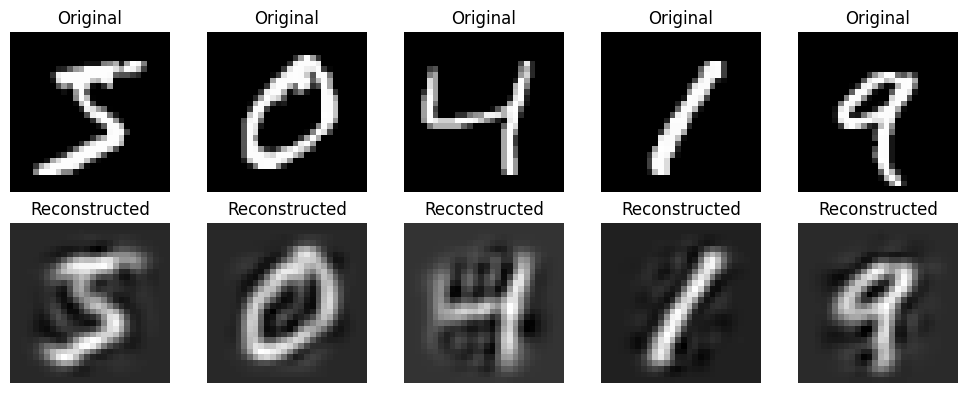

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

# TODO: Load data
(X_train, _), _ = mnist.load_data()
X_train = X_train.reshape(-1, 784).astype(np.float32)

# Apply PCA
k = 50
X_reduced, eigenvector_subset = pca(X_train, k)

# TODO: Reconstruct images
X_meaned = X_train - np.mean(X_train, axis=0, keepdims=True)
X_reconstructed = X_reduced @ eigenvector_subset.T + np.mean(X_train, axis=0, keepdims=True)

# TODO: Calculate MSE
mse = np.square(X_train - X_reconstructed).mean()
print(f"Reconstruction MSE with {k} components: {mse}")

# Visualize
n_images = 5
plt.figure(figsize=(10, 4))
for i in range(n_images):
    # Original
    plt.subplot(2, n_images, i + 1)
    plt.imshow(X_train[i].reshape(28, 28), cmap='gray')
    plt.title("Original")
    plt.axis('off')

    # Reconstructed
    plt.subplot(2, n_images, i + 1 + n_images)
    plt.imshow(X_reconstructed[i].reshape(28, 28), cmap='gray')
    plt.title("Reconstructed")
    plt.axis('off')
plt.tight_layout()
plt.show()


# 3. Classification with Reduced Dimensions

* Prepare Labels:
Use the labels from the Fashion MNIST dataset.

* Split Data:
Divide into training and testing sets.

* Apply PCA:
Reduce dimensions to various k values.

* Train Classifier:
Use a classifier (e.g., Logistic Regression) on the reduced data.

* Evaluate Performance:
Assess accuracy and analyze the impact of dimensionality reduction.

In [ ]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from tensorflow.keras.datasets import mnist

# TODO: Load data with labels
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = np.reshape(X_train, (-1, 784)).astype(np.float32) / 255
X_test = np.reshape(X_test, (-1, 784)).astype(np.float32) / 255

# TODO: Apply PCA
k = 50
X_train_reduced, eigenvector_subset = pca(X_train, k)
train_mean = np.mean(X_train, axis=0, keepdims=True)
X_test_meaned = X_test - train_mean
X_test_reduced = X_test_meaned @ eigenvector_subset

# TODO: Train classifier
clf = LogisticRegression(max_iter=1000, solver='lbfgs', multi_class='multinomial')
clf.fit(X_train_reduced, y_train)

# TODO: Predict and evaluate
y_pred = clf.predict(X_test_reduced)
accuracy = np.mean(y_pred == y_test)
print(f"Classification accuracy with {k} components: {accuracy}")


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Classification accuracy with 50 components: 0.9117


# 4. Analysis and Reporting
* Explained Variance:
Plot the explained variance ratio to determine the optimal number of components.


> NOTE : You don't need to complete the section below; just plot the graph and include its analysis in your report.



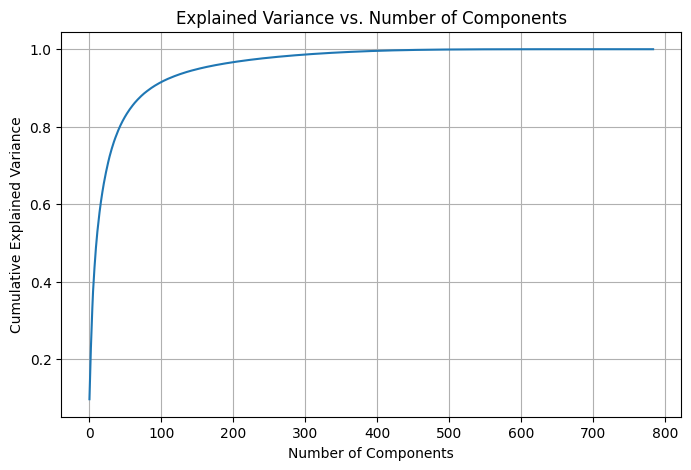

In [ ]:
def explained_variance(X):
    X_meaned = X - np.mean(X, axis=0)
    cov_mat = np.cov(X_meaned, rowvar=False)
    eigen_values, _ = np.linalg.eigh(cov_mat)
    sorted_eigenvalues = np.sort(eigen_values)[::-1]
    explained_variances = sorted_eigenvalues / np.sum(sorted_eigenvalues)
    return explained_variances

# Calculate and plot
explained_var = explained_variance(X_train)
plt.figure(figsize=(8, 5))
plt.plot(np.cumsum(explained_var))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs. Number of Components')
plt.grid(True)
plt.show()
